## Bora praticar?

Seguindo a mesma linha do exercício dado na última aula, a partir do código disponibilizado abaixo, cujo objetivo é gerar uma amostra de 1.000 observações com duas features, agrora treine o modelo hierárquico aglomerativo aprendido na última aula. Lembre-se de primeiramente criar o dendrograma para verificar a quantidade ideal de clusters. Faça um gráfico para demonstrar os agrupamentos realizados em ambos os casos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

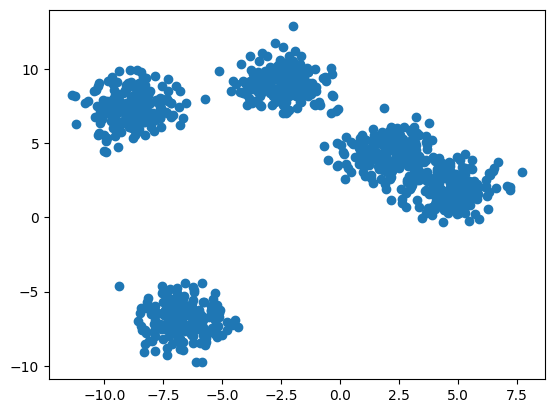

In [2]:
# geracao dos dados

from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
plt.scatter(X[:,0], X[:,1])

plt.show()

**DBSCAN**

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [5]:
df['classes_dbscan'] = dbscan.labels_

In [6]:
df['classes_dbscan'].value_counts()

classes_dbscan
 0    377
 1    187
 2    182
 3    177
-1     72
 4      5
Name: count, dtype: int64

**K-Means**

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [9]:
df['classes_kmeans'] = kmeans.labels_

**Cluster hierárquico**

In [10]:
X = df.iloc[:, [0, 1]].values

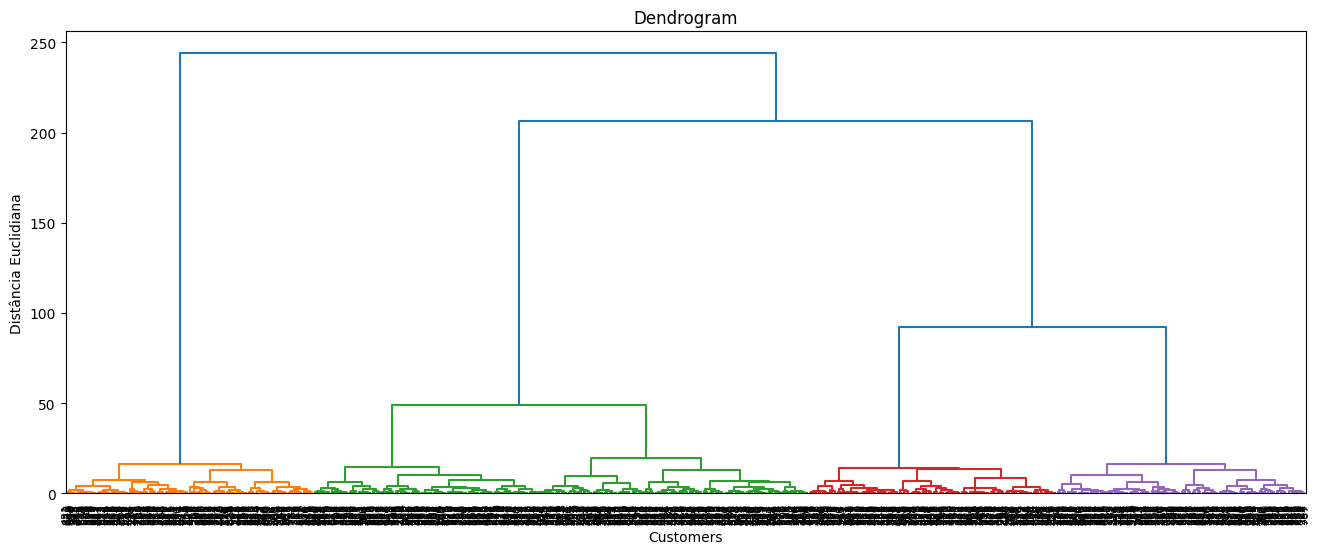

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,6))
dendrograma = sch.dendrogram(sch.linkage(X, method='ward'), leaf_font_size=8, color_threshold=55)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distância Euclidiana')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_cl = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_cl.fit(X)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [13]:
df['classes_agg_cl'] = agg_cl.labels_

In [14]:
df

,x1,x2,classes_dbscan,classes_kmeans,classes_agg_cl
0,5.020077,2.583755,0,2,0
1,3.232367,1.195353,-1,2,0
2,-6.107928,-9.728652,-1,1,1
3,5.199669,3.053950,0,2,0
4,1.380819,4.593374,0,2,0
...,...,...,...,...,...
995,-4.633093,8.488531,3,0,3
996,3.291693,2.716434,0,2,0
997,-9.447840,7.136552,2,3,2
998,4.604890,3.743970,0,2,0


**Comparação entre modelos**

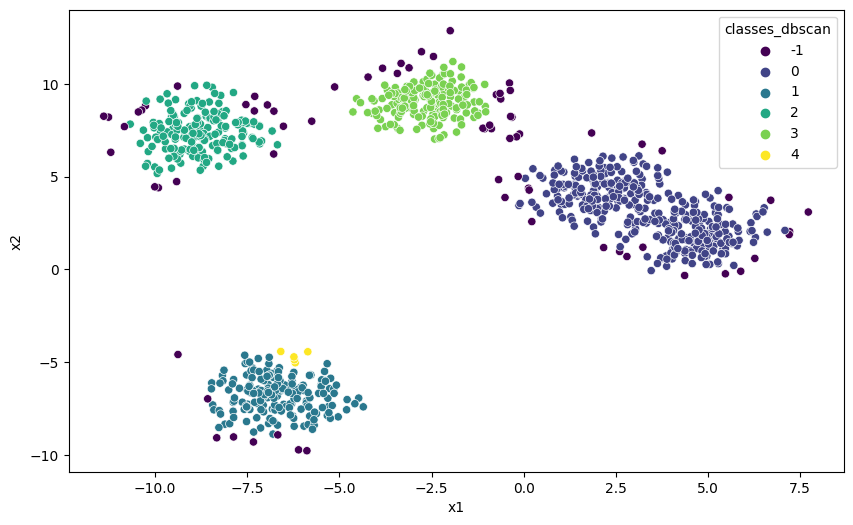

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='classes_dbscan', palette='viridis')
plt.show()

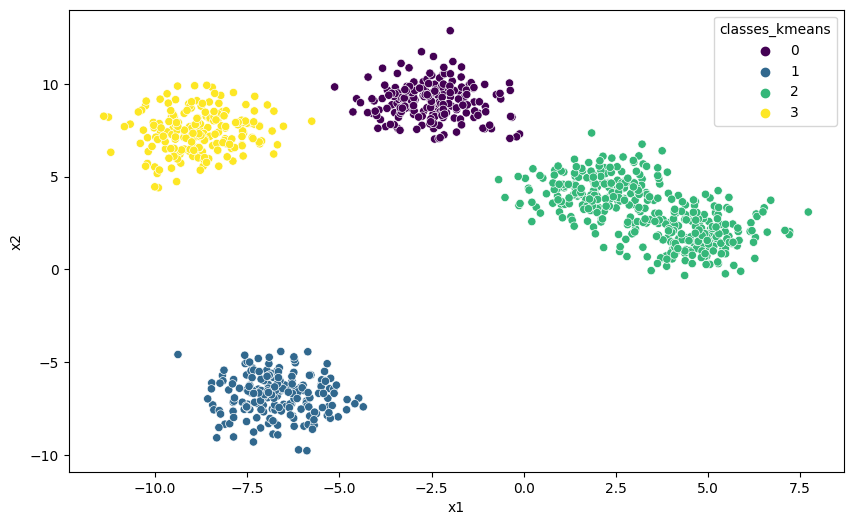

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='classes_kmeans', palette='viridis')
plt.show()

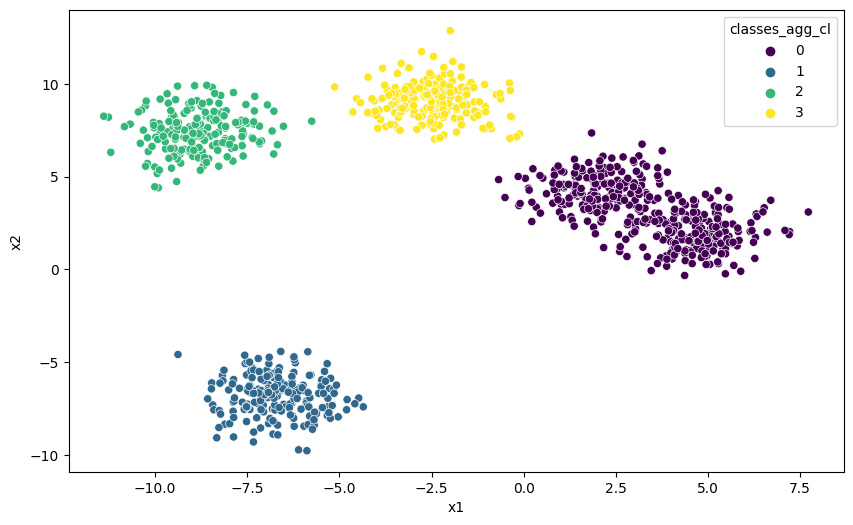

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='classes_agg_cl', palette='viridis')
plt.show()